# ICT3104 Activity Detection Notebook Tool

Welcome to the ICT3104 Group 13 Hub Activity Notebook Tool! This notebook will take you through the steps of running an "out-of-the-box" activity detection model on videos.

# Mission and Objectives for Machine Learning:

Based on Team 13 research we understand that Machine Learning has 7 Stages:

## Gathering Data:
- For this scope, Dataset is provided (TSU). If you want to find more data, either do crawling or email the website for request of more data.

What are we using?:
- Smarthome_CS.json (Cross-subject protocol)
- Smarthome_CV.json (Cross-View Protocol)

Cross-View is of a different protocol for training, by default use Cross-subject

## Data preparation:

This is where feature extraction is needed, prepare the data for analysis and training.

UPDATE**: Toyota smarthome has updated github for I3D feature extraction can be used to extract videos. (LOCAL environment using LINUX)

- Extract the videos on your local machine
  - Output: Bunch of .npy files linked per frames of a video

**OR can use COLAB I3D Feature Extraction below (v-aishin)

## Analyse Data (Inference and Evaluation) Build your Model 
Classification, Regression, Cluster analysis, Association, etc. then build the model using prepared data, and evaluate the model.


## Training the model
- Types of MODELS used (PRE-TRAINED)
  - PDAN (use this for now) , I3D (not sure maybe got more)

PDAN OUTPUT RESULTS:
- Receive a bunch of weights and biases
- Receive a 32.7% accuracy for TRAINING AND TESTING

I3D OUTPUT RESULTS: (In Progress)
- Receive a bunch of weights and biases
- Receive a ()% accuracy for TRAINING AND TESTING

## Testing the Model
- Copy paste train.py and set train to False and run val_step() function instead of train_step



## Enter Video Inputs for extraction

In [ ]:
# Get the root directory of the project
from pyprojroot import here
# Copy File
import shutil
# Widget Packages
import ipywidgets as widgets
# In case widget extension not working
# jupyter nbextension enable --py widgetsnbextension
import os

Mounted at /content/drive


In [ ]:
import os
os.listdir("C:/Work/ML_Activity_Detection/videoinputs") # Specify your own filepath here

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1PEgSrdNSDIL-QvBO6SslccQZPH99nNx0
To: /content/videoinputs.zip
100% 1.58G/1.58G [00:14<00:00, 110MB/s] 


# FEATURE EXTRACTION

1.   V-aishin version (abit sus cuz need to quote utils.py)
2.   trying out Smarthome github I3D(updated in github)


If you do not have a GPU or Local Environment, we will be using Colab Version as a tool to display what is feature extraction.

# IMPORT V-AISHIN GITHUB  


<figure>
  <img src="https://github.com/v-iashin/video_features/raw/master/docs/_assets/i3d.png" width="300" />
</figure>

The `video_features` library allows you to extract features from 
raw videos in parallel with multiple GPUs. 
It supports several extractors that capture visual appearance, 
optical flow, and audio features. See more details in the 
[GitHub repository](https://github.com/v-iashin/video_features).

## Warning: Feature Extraction is done using a GPU, this code will not work without a GPU. 
## Disclaimer: This code has already been used in google colab and videos have already been extracted

In [ ]:
#Import github feature extraction method
#Dependencies installed can be in a different environment
#Current environment using python 3.7 to install dependencies for feature extraction
#Done by Danial
!git clone https://github.com/DanialAshidiq/video_features

Cloning into 'video_features'...
remote: Enumerating objects: 1217, done.
remote: Counting objects: 100% (350/350), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 1217 (delta 240), reused 266 (delta 196), pack-reused 867
Receiving objects: 100% (1217/1217), 288.05 MiB | 8.90 MiB/s, done.
Resolving deltas: 100% (653/653), done.
Checking out files: 100% (177/177), done.


In [ ]:
!pip install omegaconf==2.0.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd /content/video_features

/content/video_features


In [ ]:
from models.i3d.extract_i3d import ExtractI3D
from utils.utils import build_cfg_path
from omegaconf import OmegaConf
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
# Done by Danial
# Display code for client purposes (For one video)
# Select the feature type
# we will be extracting 32 I3D features based on the dataset given by client
# check the yml files for parameter documentation -> how to use the code and what are the parameters necessary
input_path = 'C:/Work/ML_Activity_Detection/videoinputs'
feature_type = 'i3d'

# Load and patch the config (Load the video we want)
args = OmegaConf.load(build_cfg_path(feature_type))
args.video_paths = [input_path + 'P02T01C07.mp4'] ##Sample Video (this should NOT be the input MUST be the selected video file) (Suggestion is to make dropdown with values)
# args.show_pred = True
# args.stack_size = 24
# args.step_size = 24
# args.extraction_fps = 25
args.flow_type = 'raft' # 'pwc' is not supported on Google Colab (cupy version mismatch) (Default type honestly)
# args.streams = 'flow'

# Load the model
extractor = ExtractI3D(args)

# Extract features
for video_path in args.video_paths:
    print(f'Extracting for {video_path}')
    feature_dict = extractor.extract(video_path)
    [(print(k), print(v.shape), print(v)) for k, v in feature_dict.items()]

Extracting for /content/videoinputs/videoinputs/P02T01C07.mp4


/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


rgb
(278, 1024)
[[0.08722213 0.72140712 0.05448091 ... 0.39927715 0.06084179 0.03751946]
 [0.09569382 0.82684529 0.05770195 ... 0.51168567 0.01781808 0.15733151]
 [0.1012579  0.86840081 0.1833203  ... 0.86592567 0.01320137 0.07562003]
 ...
 [0.1191444  0.76930773 0.14157438 ... 0.77114367 0.03222982 0.0768149 ]
 [0.09500311 0.83178908 0.10145854 ... 0.77908123 0.01364897 0.03429199]
 [0.08086452 0.75392461 0.07707879 ... 0.32716626 0.06343492 0.00229635]]
flow
(278, 1024)
[[2.69604959e-02 2.40822919e-02 2.71955002e-02 ... 2.14588735e-02
  1.19002443e-02 1.30806293e-04]
 [2.75782160e-02 4.25764881e-02 2.40709092e-02 ... 4.47898284e-02
  3.68641783e-03 8.48515779e-02]
 [7.67703950e-02 6.93168640e-02 3.58110033e-02 ... 2.19283178e-01
  4.84916265e-04 3.60468000e-01]
 ...
 [3.73742059e-02 2.67902054e-02 2.69486513e-02 ... 2.12134272e-01
  1.42654954e-02 1.83756188e-01]
 [3.72552574e-02 4.51958291e-02 3.22389752e-02 ... 2.54419670e-02
  1.47802934e-01 5.29119596e-02]
 [2.92233787e-02 3.2916

In [ ]:
#open and read the file after the appending:
# Python program to explain os.listdir() method 
    
# importing os module 
import os
  
# Get the list of all files and directories
# in the root directory
path = input_path
dir_list = os.listdir(path)

f = open("videoinputs.txt", "w")
for i in dir_list:
  f.write(str(path) + "/" + str(i) + "\n")
f.close()

### Feature Extraction Main.py documentation
Inputs needed:
- state feature type you want to extract
- enter your video input path into file_with_video_path
- enter your output path (where you want to store)
- on_extraction=save_numpy streams = "rgb" 
(keep as rgb for RGB features) (can extract flow as well)
- Note, Stack Size and Step Size has to be 16, not 64 (else it training and testing will be inaccurate)

In [ ]:
!python C:/Work/ML_Activity_Detection/video_features/main.py feature_type="i3d" device="cuda:0" file_with_video_paths="C:/Work/ML_Activity_Detection/video_features/videoinputs.txt" output_path="C:/Work/ML_Activity_Detection/extracted_output" on_extraction=save_numpy streams="rgb" stack_size=16 step_size=16

feature_type: i3d
stack_size: 16
step_size: 16
streams: rgb
flow_type: pwc
extraction_fps: null
device: cuda:0
on_extraction: save_numpy
output_path: /content/drive/MyDrive/Colab/ICT3104/output/i3d
tmp_path: ./tmp/i3d
keep_tmp_files: false
show_pred: false
config: null
video_paths: null
file_with_video_paths: /content/video_features/videoinputs.txt

Saving features to /content/drive/MyDrive/Colab/ICT3104/output/i3d
Device: cuda:0
The number of specified videos: 32
  6% 2/32 [06:16<1:33:07, 186.24s/it]Features for /content/videoinputs/videoinputs/P03T02C05.mp4 already exist in /content/drive/MyDrive/Colab/ICT3104/output/i3d/ - skipping..
  9% 3/32 [06:17<49:18, 102.00s/it]  Features for /content/videoinputs/videoinputs/P02T04C05.mp4 already exist in /content/drive/MyDrive/Colab/ICT3104/output/i3d/ - skipping..
 12% 4/32 [06:19<29:08, 62.46s/it] Features for /content/videoinputs/videoinputs/P02T03C03.mp4 already exist in /content/drive/MyDrive/Colab/ICT3104/output/i3d/ - skipping..
 16% 

# Setup Environment 

## REQUIREMENTS FOR TRAINING LIBRARIES

Please satisfy the following dependencies to use this code correctly:

- pytorch 1.9
- python 3.8
- timm 0.4.12
- pickle5
- scikit-learn
- numpy

Before installing packages: check if packages are clean using Snyk Advisor tool

https://snyk.io/advisor/python
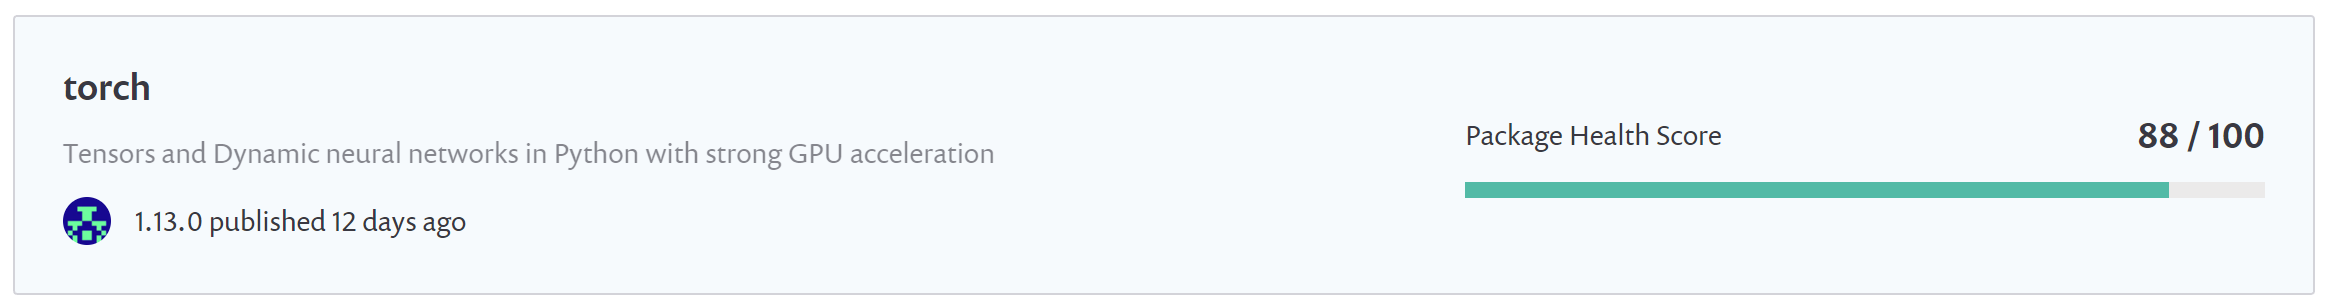

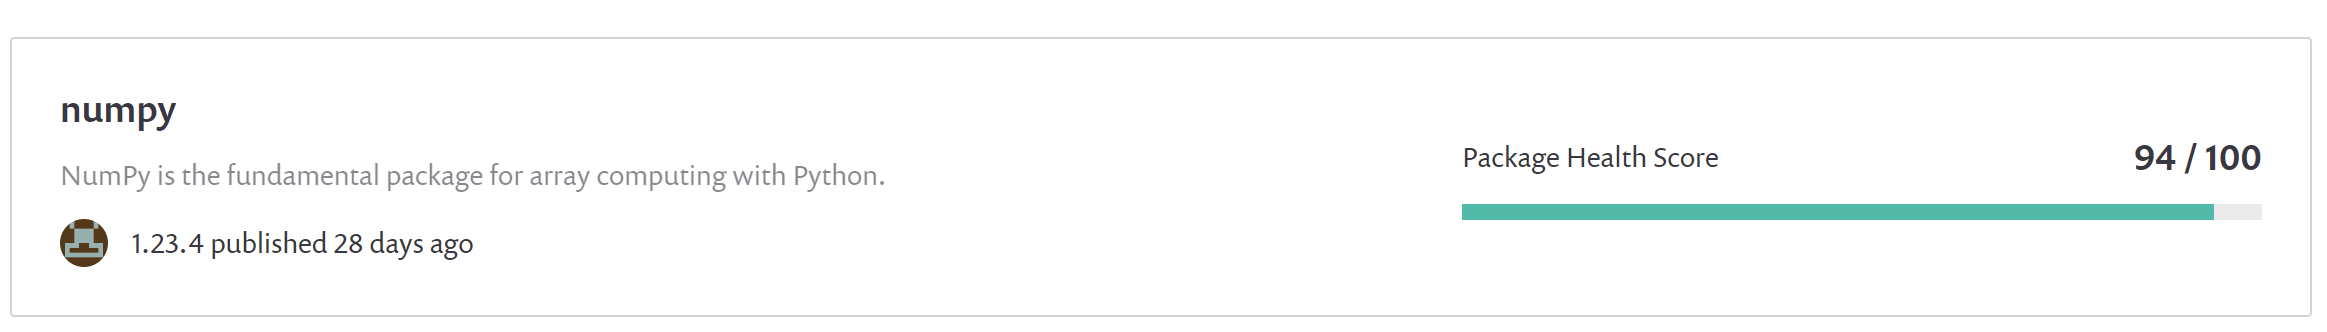

In [ ]:
!pip freeze > requirements.txt

# Defining Quantity of Extracted Features


- Teams are now not required to extract ALL features
- Each team are to extract 32 Features -> train model -> test model.

With reference to the dataset Cross-Subject json file:
- We must make our own custom JSON file with a specific 32 extracted features (Everyone's dataset will be different)
- Create a script to run a loop and file write them into a json file with the same format given in Cross-subject json sample done by Toyota Smarthome

- Refer to validate_train_test.py (In progress) (JIRA shall be updated)

Output needed:
- **32_Extracted_Feature.json (Standard naming convention)**
- These extracted feature file can be re-used and overwrite with new data if client requires a new model to learn specifically for 32 extracted features.

Currently PDAN Model is train to read RGB only (Not confirmed, maybe need as well)

Additions to be made:
- new 32 Extracted Features for RGB+FLOW and FLOW (may take HOURS)

In [ ]:
#Done by Suhaili
!python C:/Work/ML_Activity_Detection/validate_train_test.py -inputfilepath="C:\Work\ML_Activity_Detection\output\i3d" -outputfilepath="C:/Work/ML_Activity_Detection/RGB_Dataframes" -dataset="C:\Work\ML_Activity_Detection\smarthome_CS_51.json"

Total RGB+FLOW files extracted: 32
Smarthome_CS_32.json has been generated


# Training the Model using TSU



## Default parameters use for training:
- Dataset: TSU (Default)
- Cross-subject
- Model used: PDAN
- Mode: RGB (for now) (others include: RGB+FLOW and FLOW)
- Learning Rate: 0.0002 (machine's learning rate)
- kernelsize: set to 3 (Try not to adjust this,may affect python ikernel
- epoch: (140) (Epochs are made to ensure machine's learning rate at every checkpoint (the more epochs the more learning rate will be reduced) -> 140 would mean it passes 140 times of the dataset out of 536
- ARtype map: also map as default for evaluation and network
- batch_size: set to 2 but if ur GPU is strong you can train in LARGER batches instead. (A higher batch increases accuracy in training)

In [ ]:
#Debugging purposes
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
#In this code, filepath is set to the default extracted feature: 
#training RGB-TSU dataset to generate a 32.7% Accuracy of the pre-trained model when testing -> when training we use PDAN's algorithm method to craft 
#Set train to true to start training the code
#Done by Danial


#Train.py code changes:
# - Filepath to rgb_root (specify a path of rgb)
# - Filepath for train and test split (Change to your smarthome_CS_32.json)

!python3.8 /content/drive/MyDrive/Colab/ICT3104/train.py \
-dataset TSU \
-mode rgb \
-split_setting CS \
-model PDAN \
-train True \
-num_channel 512 \
-lr 0.0002 \
-kernelsize 3 \
-APtype map \
-epoch 140 \
-batch_size 1 \
-comp_info TSU_CS_RGB_PDAN \
-load_model '/content/drive/MyDrive/Colab/ICT3104/PDAN_TSU_RGB'\
-rgb_root '/content/drive/MyDrive/Colab/ICT3104/smarthome_CS_32.json' \
-featurepath '/content/drive/MyDrive/Colab/ICT3104/RGB_Dataframes' \
-outputTrain '/content/drive/MyDrive/Colab/ICT3104/'

Random_SEED!!!: 0
PDAN
batch_size: 1
cuda_avail True
RGB mode /content/drive/MyDrive/Colab/ICT3104/RGB_Dataframes
{'P02T01C06': {'subset': 'testing', 'duration': 17771, 'actions': [[0, 170, 187], [1, 181, 222], [2, 233, 1615], [3, 236, 502], [4, 600, 791], [5, 841, 936], [5, 1074, 1170], [6, 1419, 1468], [5, 1616, 1807], [7, 2502, 2693], [8, 2910, 2992], [0, 4957, 4987], [9, 4961, 4990], [1, 5022, 5074], [10, 6466, 6523], [11, 6770, 6860], [1, 6926, 6947], [1, 6969, 7020], [9, 6997, 7017], [12, 7444, 7578], [13, 7756, 7836], [13, 7903, 7962], [13, 7974, 8026], [1, 8097, 8135], [1, 8164, 8209], [14, 8300, 8379], [1, 8383, 8428], [14, 8662, 8748], [8, 9220, 9296], [0, 10340, 10374], [1, 10362, 10392], [8, 10388, 10411], [0, 10445, 10470], [1, 10471, 10504], [2, 10489, 11397], [3, 10494, 10692], [4, 10743, 10871], [5, 10935, 11002], [6, 11288, 11332], [5, 11469, 11625], [1, 11717, 11798], [8, 12119, 12169], [0, 12591, 12635], [7, 12621, 12869], [8, 12881, 12929], [0, 14529, 14619], [9, 14

## Video Inferencing 

### Default parameters use for testing:
### Similar to training however set train to false and call Evaluation code method for evaluation
- Set Train to false

## Video Inference using Pre-trained PDAN Model

Map each output(classes) to aka Annotations:
- 0 Enter
- 1 Walk
- 2 Make_coffee
- 3 Get_water
- 4 Make_coffee
- 5 Use_Drawer
- 6 Make_coffee.Pour_grains
- 7 Use_telephone
- 8 Leave
- 9 Put_something_on_table
- 10 Take_something_off_table
- 11 Pour.From_kettle
- 12 Stir_coffee/tea
- 13 Drink.From_cup
- 14 Dump_in_trash
- 15 Make_tea
- 16 Make_tea.Boil_water
- 17 Use_cupboard
- 18 Make_tea.Insert_tea_bag
- 19 Read
- 20 Take_pills
- 21 Use_fridge
- 22 Clean_dishes
- 23 Clean_dishes.Put_something_in_sink
- 24 Eat_snack
- 25 Sit_down
- 26 Watch_TV
- 27 Use_laptop
- 28 Get_up
- 29 Drink.From_bottle
- 30 Pour.From_bottle
- 31 Drink.From_glass
- 32 Lay_down
- 33 Drink.From_can
- 34 Write
- 35 Breakfast
- 36 Breakfast.Spread_jam_or_butter
- 37 Breakfast.Cut_bread
- 38 Breakfast.Eat_at_table
- 39 Breakfast.Take_ham
- 40 Clean_dishes.Dry_up
- 41 Wipe_table
- 42 Cook
- 43 Cook.Cut
- 44 Cook.Use_stove
- 45 Cook.Stir
- 46 Cook.Use_oven
- 47 Clean_dishes.Clean_with_water
- 48 Use_tablet
- 49 Use_glasses
- 50 Pour.From_can


Classification metrics:

When performing classification predictions, there's four types of outcomes that could occur.

- True positives are when you predict an observation belongs to a class and it actually does belong to that class.(TP)
- True negatives are when you predict an observation does not belong to a class and it actually does not belong to that class. (TN)
- False positives occur when you predict an observation belongs to a class when in reality it does not. (FP)
- False negatives occur when you predict an observation does not belong to a class when in fact it does.(FN)



In [ ]:
#Collect annotations
! gdown --id 1jvDpOlLyZTWJk20eJJgEcywulzQt8hVj

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1jvDpOlLyZTWJk20eJJgEcywulzQt8hVj
To: /content/Annotation.zip
100% 431k/431k [00:00<00:00, 49.4MB/s]


In [ ]:
from zipfile import ZipFile

In [ ]:
#Extract annotations here
with ZipFile("/content/Annotation.zip",'r') as zipObj:
  zipObj.extractall("/content/annotations")

In [ ]:
!python3.8 -m pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 10.9 MB/s eta 0:00:00


In [73]:
import glob
print(os.getcwd())


C:\Users\weiji\Desktop\ict3104-team13-2022\ML_Activity_Detection


In [7]:
#Done by Han Zheng
#In this code, filepath is set to the default extracted feature: 
#training RGB-TSU dataset to generate a 32.7% Accuracy when testing -> when training we use PDAN's algorithm method to craft 
#Set train to false then use test.py to start testing the model (we load PDAN as our model to test on 20% of your own dataset)
#Generate the results and accuracy and you can store in CSV (Most complex cuz you gotta understand them values bruh)
from pathlib import Path

def inferFunc(filename, directoryPath, pdanPath, inferencePath, jsonPath, dataframePath, annotationPath, savedPath):
    !python $inferencePath \
    -dataset TSU \
    -mode rgb \
    -split_setting CS \
    -model PDAN \
    -train False \
    -num_channel 512 \
    -lr 0.0002 \
    -kernelsize 3 \
    -APtype map \
    -epoch 5 \
    -batch_size 1 \
    -comp_info TSU_CS_RGB_PDAN \
    -load_model $pdanPath \
    -rgb_root $jsonPath \
    -featurepath $dataframePath \
    -VideoInputTest fileName \
    -video_path filePath \
    -annotations annotationPath \
    -filepath savedPath

## Testing Model

In [ ]:
#Done by Kenrick
#In this code, filepath is set to the default extracted feature: 
#training RGB-TSU dataset to generate a 32.7% Accuracy when testing -> when training we use PDAN's algorithm method to craft 
#Set train to false then use test.py to start testing the model (we load PDAN as our model to test on 20% of your own dataset)
#Generate the results and accuracy and you can store in CSV (Most complex cuz you gotta understand them values bruh)
!python3.8 /content/drive/MyDrive/Colab/ICT3104/test.py \
-dataset TSU \
-mode rgb \
-split_setting CS \
-model PDAN \
-train False \
-num_channel 512 \
-lr 0.0002 \
-kernelsize 3 \
-APtype map \
-epoch 140 \
-batch_size 2 \
-comp_info TSU_CS_RGB_PDAN \
-load_model '/content/drive/MyDrive/Colab/ICT3104/PDAN/model_epoch_0.0002_98'\
-rgb_root '/content/drive/MyDrive/Colab/ICT3104/smarthome_CS_32.json' \
-featurepath '/content/drive/MyDrive/Colab/ICT3104/RGB_Dataframes'

/bin/bash: python3.8: command not found


# Training the Model using STEP


##Installation steps to follow to use the STEP model

- Clone APEX
- Clone STEP
- Build and Develop
- Run DEMO

STEP: Spatio-Temporal Progressive Learning for Video Action Detection

https://github.com/NVlabs/STEP.git

In [ ]:
!git clone https://github.com/NVlabs/STEP.git

Cloning into 'STEP'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 124 (delta 15), reused 14 (delta 14), pack-reused 107
Receiving objects: 100% (124/124), 4.08 MiB | 17.92 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [ ]:
!python /content/STEP/scripts/extract_clips.py

In [ ]:
%cd STEP/

/content/STEP


In [ ]:
#Warning non-colab pro users will suffer here, your GPU may or may not crash installing torch as it is 2.1GB of data
!python -m pip install torch==1.10.1+cu111 torchvision==0.11.2+cu111 torchaudio==0.10.1 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
!python setup.py build develop #Only works after you install torch

running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/models
copying models/i3dpt.py -> build/lib.linux-x86_64-3.7/models
copying models/two_branch.py -> build/lib.linux-x86_64-3.7/models
copying models/networks.py -> build/lib.linux-x86_64-3.7/models
copying models/__init__.py -> build/lib.linux-x86_64-3.7/models
creating build/lib.linux-x86_64-3.7/utils
copying utils/utils.py -> build/lib.linux-x86_64-3.7/utils
copying utils/vis_utils.py -> build/lib.linux-x86_64-3.7/utils
copying utils/tube_utils.py -> build/lib.linux-x86_64-3.7/utils
copying utils/solver.py -> build/lib.linux-x86_64-3.7/utils
copying utils/__init__.py -> build/lib.linux-x86_64-3.7/utils
copying utils/eval_utils.py -> build/lib.linux-x86_64-3.7/utils
creating build/lib.linux-x86_64-3.7/data
copying data/data_utils.py -> build/lib.linux-x86_64-3.7/data
copying data/ava.py -> build/lib.linux-x86_64-3.7/data
copying data/ava_cls.py -> build/lib.linux-x86_6

Try STEP on your own video data! Our model pre-trained on the AVA dataset can effectively detect common actions 

(e.g., stand, sit, walk, run, talk to, etc.) in general videos.

First, extract frames of your own videos and organize them in datasets/demo/frames/ as follows:

In [ ]:
#Keep in mind, specify the videos in datasets/demo/frames (basically your own inputs) frames wise would be your extracted features
!python demo.py

In [ ]:
%cd scripts

In [ ]:
!bash train_step.sh

##Insert STEP Data and Train the Model


##TSU Evaluation

**Create a matrix to evaluate your model (how many TPs, TNs, FPs, FNs)**

### Evaluation method

- Run eval_model() method and print output as an output, will be able to see the positives and negatives.

- Next step is to show overfitting/underfitting

(Up to you vibe)

In [ ]:
#Clone Evaluation code however parameter covers only 1 video which is number P02T02C03.txt for event based
# Evaluation will be done in frame based as a default parameter
# Either choose event based or frame based
!git clone https://github.com/dairui01/TSU_evaluation

Cloning into 'TSU_evaluation'...
remote: Enumerating objects: 97, done.
remote: Total 97 (delta 0), reused 0 (delta 0), pack-reused 97
Unpacking objects: 100% (97/97), done.


### Evaluation step - Map by Frames
- output = From STEP testing 

In [ ]:
!python3.8 /content/TSU_evaluation/Frame_map/Frame_based_map.py -split CS -pkl_path /content/TSU_evaluation/Frame_map/test.pkl

/content/TSU_evaluation/Frame_map/apmeter.py:118: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  rg = torch.range(1, self.scores.size(0)).float()
/content/TSU_evaluation/Frame_map/apmeter.py:146: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:28.)
  ap[k] = precision[truth.byte()].sum() / max(truth.sum(), 1)
Test Frame-based map tensor(27.1248)


### Evaluation step - Map by Events
- output = From TSU

In [ ]:
!python3.8 /content/TSU_evaluation/Event_map/Event_based_map.py -pred_path /content/TSU_evaluation/Event_map/pred -gt_path /content/TSU_evaluation/Event_map/gt -theta 0.3

/content/TSU_evaluation/Event_map/pred/test/
evaluation for method: test
---- for theta = 0.300000
-------- mAP_action =  0.07549673909968027
-------- AP_action =  [0.25, 0.6618055555555554, 0, 0, 0, 0, 0, 0, 0.25, 0, 0, 0.5, 0, 0.0909090909090909, 0, 0.3333333333333333, 0.25, 0.6333333333333333, 0, 0.3333333333333333, 0, 0.047619047619047616, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-------- mAP_video =  0.34504021784934913


### MS-TCT Implementation

In this repository, we provide an implementation of "MS-TCT: Multi-Scale Temporal ConvTransformer for Action Detection" on Charades dataset (Localization setting, i.e., Charades_v1_localize). If you want to train and evaluate MS-TCT, you can follow the following steps. For MultiTHUMOS, you can follow the training process


In [ ]:
!git clone https://github.com/dairui01/MS-TCT

# Visualization using wandb.ai

- Weights and Biases are a good way to display visualisation for your model's training and testing data

In [ ]:
!python3.8 /content/drive/MyDrive/Colab/ICT3104/visualisation.py

## GUI 

In [1]:
# tracebility for T13-44 and T13-45. Sanitize inputs, prevent user from injecting scripts.

import tkinter as tk
from tkinter import ttk
import os
from pathlib import Path
import html


def changeDropDownList(directoryPath):
    directoryPath += "/ML_Activity_Detection/videoinputs"
    directory_files = os.listdir(directoryPath)
    listFiles = []
    
    for file in directory_files:
        listFiles.append(str(file))
        
    comboExample["values"] = listFiles
    
def retrieve_path(event):
    directoryPath = E.get()
    changeDropDownList(directoryPath)
    
    
def processFile(event):
    filename = comboExample.get() 
    print(str(filename) + " is selected.")
    
    directoryPath = E.get()

    inferencePath = directoryPath + "/ML_Activity_Detection/inference.py"
    pdanPath = directoryPath + "/ML_Activity_Detection/PDAN_TSU_RGB"
    jsonPath = directoryPath + "/ML_Activity_Detection/smarthome_CS_51.json"
    dataframePath = directoryPath + "/ML_Activity_Detection/RGB_Dataframes"
    annotationPath = directoryPath + "/ML_Activity_Detection/Annotation"
    savedPath = directoryPath + "/ML_Activity_Detection/SavedPath"
    
    inferFunc(filename, directoryPath, pdanPath, inferencePath,jsonPath, dataframePath, annotationPath, savedPath)
    
# directoryPath = 'C:/Users/weiji/Desktop/ict3104-team13-2022'
app = tk.Tk() 
app.geometry('400x300')

labelTop = tk.Label(app,
                    text = "Please select a file name : ")


comboExample = ttk.Combobox(app, state="readonly",
                            values=[""])


 
# Create text widget and specify size.
E = tk.Entry(app, width = 52)
 
# Create label
l = tk.Label(app, text = "Enter directory here")
l.config(font =("Courier", 14))
 
Fact = """Remove texts here and Enter the directory here"""
 
# Create button for processing.
generate_button = tk.Button(app, text = "Generate Filenames", )
generate_button.bind("<Button-1>", retrieve_path)

process_button = tk.Button(app, text = "Process File", )
process_button.bind("<Button-1>", processFile)


l.grid(column=2, row=2)
E.grid(column=2, row=3)
generate_button.grid(column=2, row=4)
labelTop.grid(column=2, row=5)
comboExample.grid(column=2, row=6)
process_button.grid(column=2, row=7)
 
# Insert The Fact.
E.insert(tk.END, html.escape(Fact))

#testing for sanitisation
print(html.escape("sus symbols <><<><."))



app.mainloop()

sus symbols &lt;&gt;&lt;&lt;&gt;&lt;.


In [6]:
!nvidia-smi

Fri Nov 11 17:44:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 522.06       Driver Version: 522.06       CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   48C    P8    N/A /  N/A |     77MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------